<a href="https://colab.research.google.com/github/clizarraga-UAD7/Notebooks/blob/main/Maps_VectorRaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install earthpy --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 27.7 MB/s eta 0:00:00


In [3]:
# Import libraries
import os
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import box
import geopandas as gpd
import earthpy as et

# Get the data & set working dir
data = et.data.get_data('spatial-vector-lidar')
os.chdir(os.path.join(et.io.HOME, 'earth-analytics', 'data'))

Extracted output to /root/earth-analytics/data/spatial-vector-lidar/.


## Import data

In [4]:
# Import roads shapefile
sjer_roads_path = os.path.join("spatial-vector-lidar",
                               "california", "madera-county-roads",
                               "tl_2013_06039_roads.shp")

sjer_roads = gpd.read_file(sjer_roads_path)

# View data type
print(type(sjer_roads['RTTYP']))

<class 'pandas.core.series.Series'>


## Road types

M = Municipal,
S = State,
C = County

In [8]:
# View unique attributes for each road in the data
print(sjer_roads['RTTYP'].unique())

['M' 'Unknown' 'S' 'C']


In [9]:
# Map each value to a new value
sjer_roads['RTTYP'].replace(np.nan, 'Unknown', inplace=True)

print(sjer_roads['RTTYP'].unique())

['M' 'Unknown' 'S' 'C']


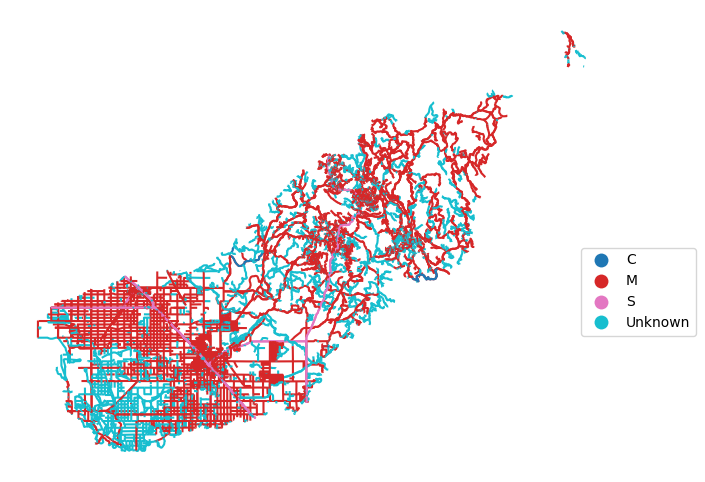

In [10]:
fig, ax = plt.subplots(figsize=(14, 6))

sjer_roads.plot(column='RTTYP',
                categorical=True,
                legend=True,
                ax=ax)

# Adjust legend location
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.15,0.5))

ax.set_axis_off()

plt.show()

In [11]:
# Create a dictionary where you assign each attribute value to a particular color
roadPalette = {'M': 'blue',
               'S': 'green',
               'C': 'purple',
               'Unknown': 'grey'}
roadPalette

{'M': 'blue', 'S': 'green', 'C': 'purple', 'Unknown': 'grey'}

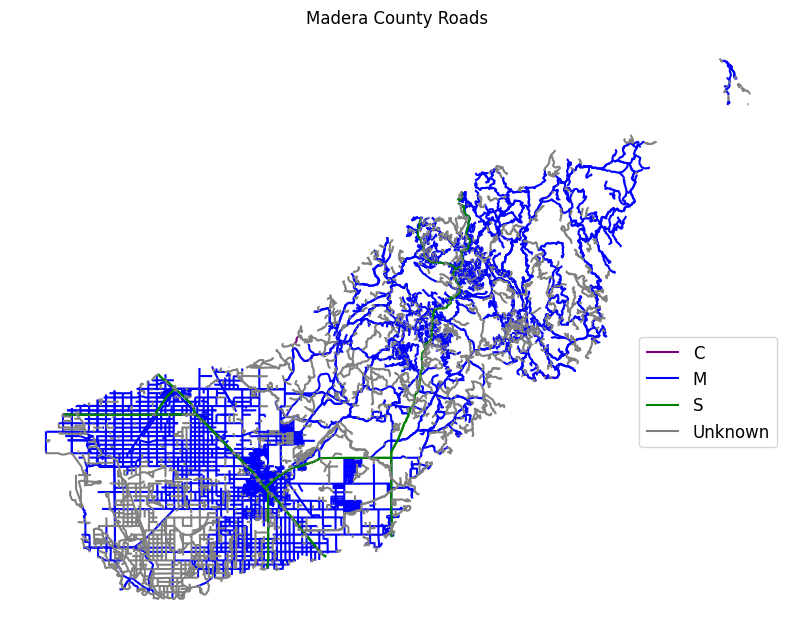

In [12]:
# Plot data
fig, ax = plt.subplots(figsize=(10, 10))

# Loop through each attribute type and plot it using the colors assigned in the dictionary
for ctype, data in sjer_roads.groupby('RTTYP'):

    # Define the color for each group using the dictionary
    color = roadPalette[ctype]

    # Plot each group using the color defined above
    data.plot(color=color,
              ax=ax,
              label=ctype)

ax.legend(bbox_to_anchor=(1.0, .5), prop={'size': 12})
ax.set(title='Madera County Roads')

ax.set_axis_off()
plt.show()

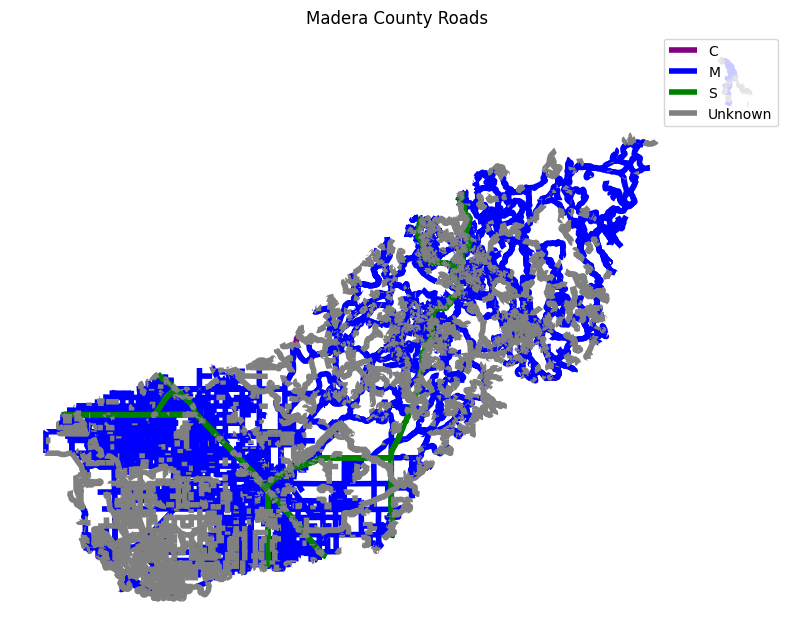

In [13]:
# Adjust line width
fig, ax = plt.subplots(figsize=(10, 10))

# Loop through each group (unique attribute value) in the roads layer and assign it a color
for ctype, data in sjer_roads.groupby('RTTYP'):
    color = roadPalette[ctype]
    data.plot(color=color,
              ax=ax,
              label=ctype,
              linewidth=4)  # Make all lines thicker

# Add title and legend to plot
ax.legend()
ax.set(title='Madera County Roads')
ax.set_axis_off()

plt.show()

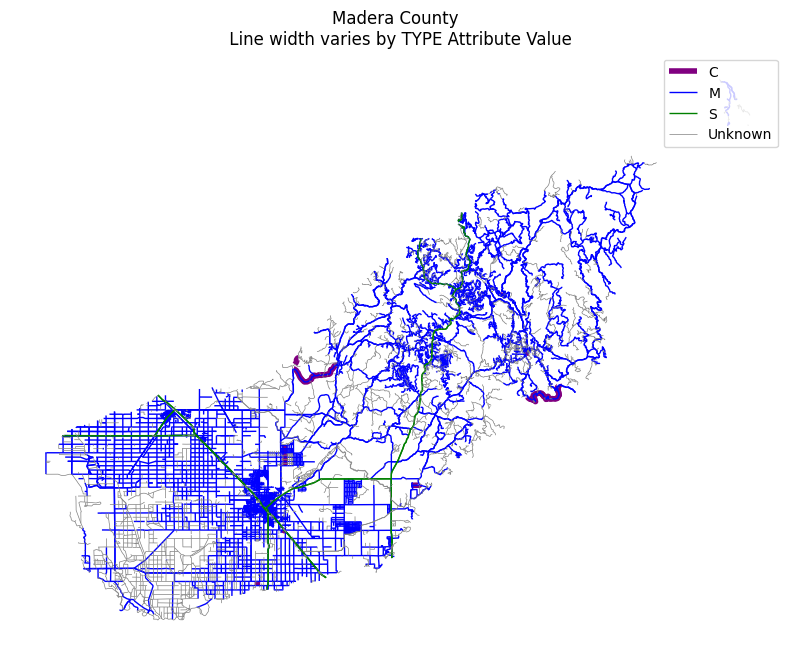

In [14]:
# Create dictionary to map each attribute value to a line width
lineWidths = {'M': 1, 'S': 1, 'C': 4, 'Unknown': .5}

# Plot data adjusting the linewidth attribute
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_axis_off()

for ctype, data in sjer_roads.groupby('RTTYP'):
    color = roadPalette[ctype]
    data.plot(color=color,
              ax=ax,
              label=ctype,

              # Assign each group to a line width using the dictionary created above
              linewidth=lineWidths[ctype])

ax.legend()
ax.set(title='Madera County \n Line width varies by TYPE Attribute Value')
plt.show()

## Plot lines by attribute

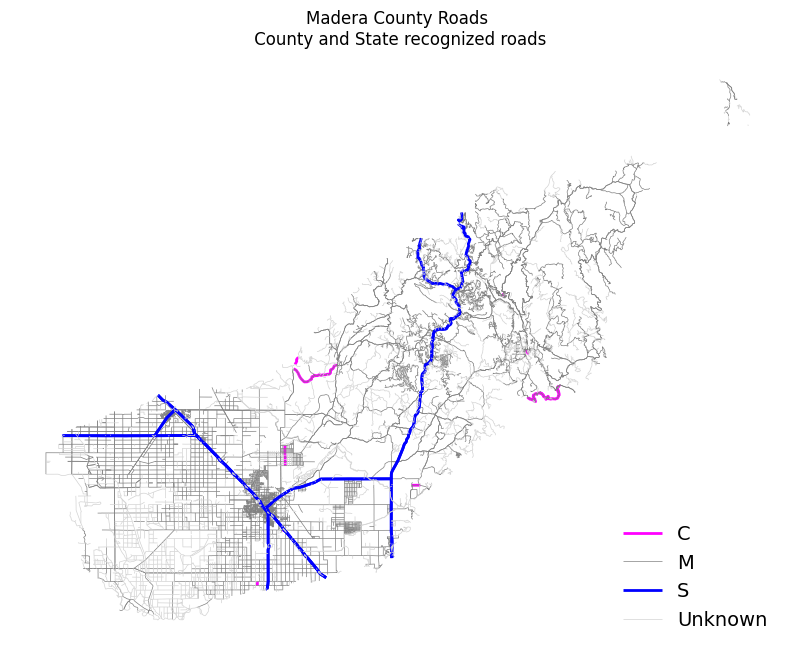

In [16]:
# Define colors and line widths
roadPalette = {'M': 'grey', 'S': "blue",
               'C': "magenta", 'Unknown': "lightgrey"}

lineWidths = {'M': .5, 'S': 2, 'C': 2, 'Unknown': .5}

fig, ax = plt.subplots(figsize=(10, 10))

for ctype, data in sjer_roads.groupby('RTTYP'):
    color = roadPalette[ctype]
    label = ctype

    data.plot(color=color,
              ax=ax,
              linewidth=lineWidths[ctype],
              label=label)

ax.set(title='Madera County Roads\n County and State recognized roads')

ax.legend(loc='lower right',
          fontsize=14,
          frameon=False)

ax.set_axis_off()
plt.show()

# Create an interactive map

In [17]:
import os
import folium
import geopandas as gpd
import earthpy as et

# Get the data and set working directory
data = et.data.get_data('spatial-vector-lidar')
os.chdir(os.path.join(et.io.HOME, 'earth-analytics', 'data'))

In [23]:
# Create interactive map with default basemap (Tucson, AZ)
map_osm = folium.Map(location=[32.248814, -110.987419])
map_osm


In [20]:
# Import SJER plot locations using geopandas
SJER_plot_locations_path = os.path.join("spatial-vector-lidar",
                                        "california",
                                        "neon-sjer-site",
                                        "vector_data",
                                        "SJER_plot_centroids.shp")

SJER_plot_locations = gpd.read_file(SJER_plot_locations_path)

## Add Vector Data to Interactive Map

In [24]:
# Project to WGS 84 and save to json for plotting on interactive map
SJER_plot_locations_json = SJER_plot_locations.to_crs(epsg=4326).to_json()

# Create interactive map and add SJER plot locations
SJER_map = folium.Map([37.12, -119.737],
                  zoom_start=14)

points = folium.features.GeoJson(SJER_plot_locations_json)

SJER_map.add_child(points)
SJER_map

In [42]:
!pip install geodatasets --quiet

In [43]:
!pip install contextily --quiet

Extracting 'phx/phx.gpkg' from '/root/.cache/geodatasets/phx2.zip' to '/root/.cache/geodatasets/phx2.zip.unzip'


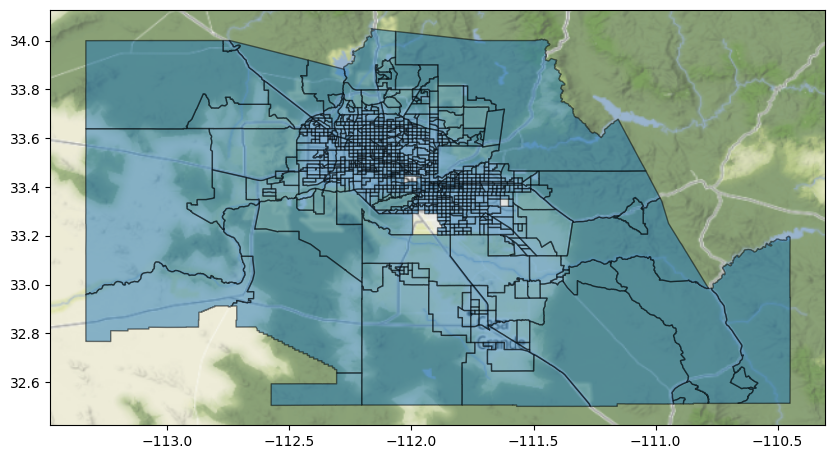

In [91]:
# This needs to have your API_KEY from https://stadiamaps.com/
# Please open an account and select Stadia Free plan

# Import the necessary libraries
import geopandas
import geodatasets
import contextily as cx

# Create a dataframe with the Phoenix American Community Survey Data
df = geopandas.read_file(geodatasets.get_path("geoda.phoenix_acs"))

# Define the plot size, transparency, and edge color
ax = df.plot(figsize=(10, 10), alpha=0.5, edgecolor="k")
# Draw the basemap under the plot, define the Coordinate Reference System, and add the XYZ Stamen Terrian style (don't forget to add your API key)
cx.add_basemap(ax, crs=df.crs, source='https://tiles.stadiamaps.com/tiles/stamen_terrain/{z}/{x}/{y}{r}.png?api_key=YOUR_API_KEY')

In [99]:
import folium
import xyzservices.providers as xyz

# Tucson AZ
m = folium.Map(location=[32.248814, -110.987419], zoom_start=15)

#Add the Stadia Maps Stamen Toner provider details via xyzservices
tile_provider = xyz.Stadia.StamenTonerLite

#Update the URL to include the API key placeholder
tile_provider["url"] = tile_provider["url"] + "?api_key={api_key}"

#Create the folium TileLayer, specifying the API key
folium.TileLayer(
    tiles=tile_provider.build_url(api_key='YOUR_API_KEY'),
    attr=tile_provider.attribution,
    name=tile_provider.name,
    max_zoom=tile_provider.max_zoom,
    detect_retina=True
).add_to(m)

folium.LayerControl().add_to(m)
m

In [90]:
geodatasets.data

{'geoda': {'airbnb': {'url': 'https://geodacenter.github.io/data-and-lab//data/airbnb.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.airbnb',
   'description': 'Airbnb rentals, socioeconomics, and crime in Chicago',
   'geometry_type': 'Polygon',
   'nrows': 77,
   'ncols': 21,
   'details': 'https://geodacenter.github.io/data-and-lab//airbnb/',
   'hash': 'a2ab1e3f938226d287dd76cde18c00e2d3a260640dd826da7131827d9e76c824',
   'filename': 'airbnb.zip'},
  'atlanta': {'url': 'https://geodacenter.github.io/data-and-lab//data/atlanta_hom.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.atlanta',
   'description': 'Atlanta, GA region homicide counts and rates',
   'geometry_type': 'Polygon',
   'nrows': 90,
   'ncols': 24,
   'details': 'https://geodacenter.github.io/data-and-lab//atlanta_old/',
   'hash': 'a33a76e12168fe84361e60c88a9df4856730487305846c559715c89b1a2b5e09',
   'filename': 'atlanta_hom.zip',
   'members': ['atlanta_hom/atl_hom.geojson']},
  'cars': {'url': 'https://geodacenter.github.io/data-and-lab//data/Abandoned_Vehicles_Map.csv',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.cars',
   'description': '2011 abandoned vehicles in Chicago (311 complaints).',
   'geometry_type': 'Point',
   'nrows': 137867,
   'ncols': 21,
   'details': 'https://geodacenter.github.io/data-and-lab//1-source-and-description/',
   'hash': '6a0b23bc7eda2dcf1af02d43ccf506b24ca8d8c6dc2fe86a2a1cc051b03aae9e',
   'filename': 'Abandoned_Vehicles_Map.csv'},
  'charleston1': {'url': 'https://geodacenter.github.io/data-and-lab//data/CharlestonMSA.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.charleston1',
   'description': '2000 Census Tract Data for Charleston, SC MSA and counties',
   'geometry_type': 'Polygon',
   'nrows': 117,
   'ncols': 31,
   'details': 'https://geodacenter.github.io/data-and-lab//charleston-1_old/',
   'hash': '4a4fa9c8dd4231ae0b2f12f24895b8336bcab0c28c48653a967cffe011f63a7c',
   'filename': 'CharlestonMSA.zip',
   'members': ['CharlestonMSA/sc_final_census2.gpkg']},
  'charleston2': {'url': 'https://geodacenter.github.io/data-and-lab//data/CharlestonMSA2.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.charleston2',
   'description': '1998 and 2001 Zip Code Business Patterns (Census Bureau) for Charleston, SC MSA',
   'geometry_type': 'Polygon',
   'nrows': 42,
   'ncols': 60,
   'details': 'https://geodacenter.github.io/data-and-lab//charleston2/',
   'hash': '056d5d6e236b5bd95f5aee26c77bbe7d61bd07db5aaf72866c2f545205c1d8d7',
   'filename': 'CharlestonMSA2.zip',
   'members': ['CharlestonMSA2/CharlestonMSA2.gpkg']},
  'chicago_health': {'url': 'https://geodacenter.github.io/data-and-lab//data/comarea.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.chicago_health',
   'description': 'Chicago Health + Socio-Economics',
   'geometry_type': 'Polygon',
   'nrows': 77,
   'ncols': 87,
   'details': 'https://geodacenter.github.io/data-and-lab//comarea_vars/',
   'hash': '4e872adb552786eae2fcd745524696e5e4cd33cc9a6c032471c0e75328871401',
   'filename': 'comarea.zip'},
  'chicago_commpop': {'url': 'https://geodacenter.github.io/data-and-lab//data/chicago_commpop.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.chicago_commpop',
   'description': 'Chicago Community Area Population Percent Change for 2000 and 2010',
   'geometry_type': 'Polygon',
   'nrows': 77,
   'ncols': 9,
   'details': 'https://geodacenter.github.io/data-and-lab//commpop/',
   'hash': '1dbebb50c8ea47e2279ea819ef64ba793bdee2b88e4716bd6c6ec0e0d8e0e05b',
   'filename': 'c

# Overlay Rasters in Python

In [30]:
!pip install rioxarray --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 1.1 MB/s eta 0:00:00


In [31]:
import os
import matplotlib.pyplot as plt
import numpy as np
import rioxarray as rxr
import earthpy as et
import earthpy.plot as ep

# Import data from EarthPy
data = et.data.get_data('colorado-flood')

# Set working directory
os.chdir(os.path.join(et.io.HOME, 'earth-analytics', 'data'))

Extracted output to /root/earth-analytics/data/colorado-flood/.


In [32]:
# Open DTM data(Digital Terrain Model (DTM))
lidar_dem_path = os.path.join("colorado-flood",
                              "spatial",
                              "boulder-leehill-rd",
                              "pre-flood",
                              "lidar",
                              "pre_DTM.tif")

lidar_dem_im = rxr.open_rasterio(lidar_dem_path, masked=True)

# Open DTM hillshade
lidar_hs_path = os.path.join("colorado-flood",
                             "spatial",
                              "boulder-leehill-rd",
                             "pre-flood",
                              "lidar",
                             "pre_DTM_hill.tif")

lidar_dem_hill = rxr.open_rasterio(lidar_hs_path, masked=True)

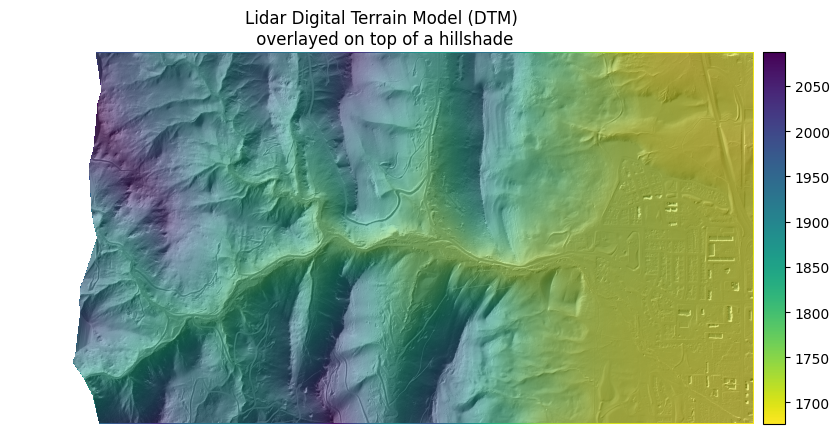

In [33]:
fig, ax = plt.subplots(figsize=(10, 6))

ep.plot_bands(lidar_dem_im,
              ax=ax,
              cmap='viridis_r',
              title="Lidar Digital Terrain Model (DTM)\n overlayed on top of a hillshade")

ep.plot_bands(lidar_dem_hill,
              cmap='Greys',
              alpha=0.5,
              ax=ax,
              cbar=False)

ax.set_axis_off()

plt.show()

# Building interactive maps

In [100]:
# Import necessary packages
import os
import folium
from folium import plugins
import rioxarray as rxr
import earthpy as et
import earthpy.spatial as es

# Import data from EarthPy
data = et.data.get_data('colorado-flood')

# Set working directory to earth-analytics
os.chdir(os.path.join(et.io.HOME, 'earth-analytics', 'data'))

In [101]:
# Simple base map
# Create a map using the Map() function and the coordinates for Boulder, CO
m = folium.Map(location=[40.0150, -105.2705])

# Display the map
m

In [37]:

# Create a map using Stamen Terrain as the basemap
m = folium.Map(location=[40.0150, -105.2705],
               tiles = 'OpenStreetMap')

# Display map
m

## Raster Overlay on Interactive Map

In [102]:
# Create a variable for destination coordinate system
dst_crs = 'EPSG:4326'

# Path to raster
in_path = os.path.join("colorado-flood",
                       "spatial",
                       "boulder-leehill-rd",
                       "post-flood",
                       "lidar",
                       "post_DTM.tif")

# Open the raster in rioxarray
img = rxr.open_rasterio(in_path, masked=True)

# Reproject the raster to be the correct crs
img = img.rio.reproject(dst_crs)

# Replace all null values with the minimum value in the array
img_plot = img.where(~img.isnull(), img.min())

# Scale the array from 0 to 255
scaled_img = es.bytescale(img_plot.values[0])


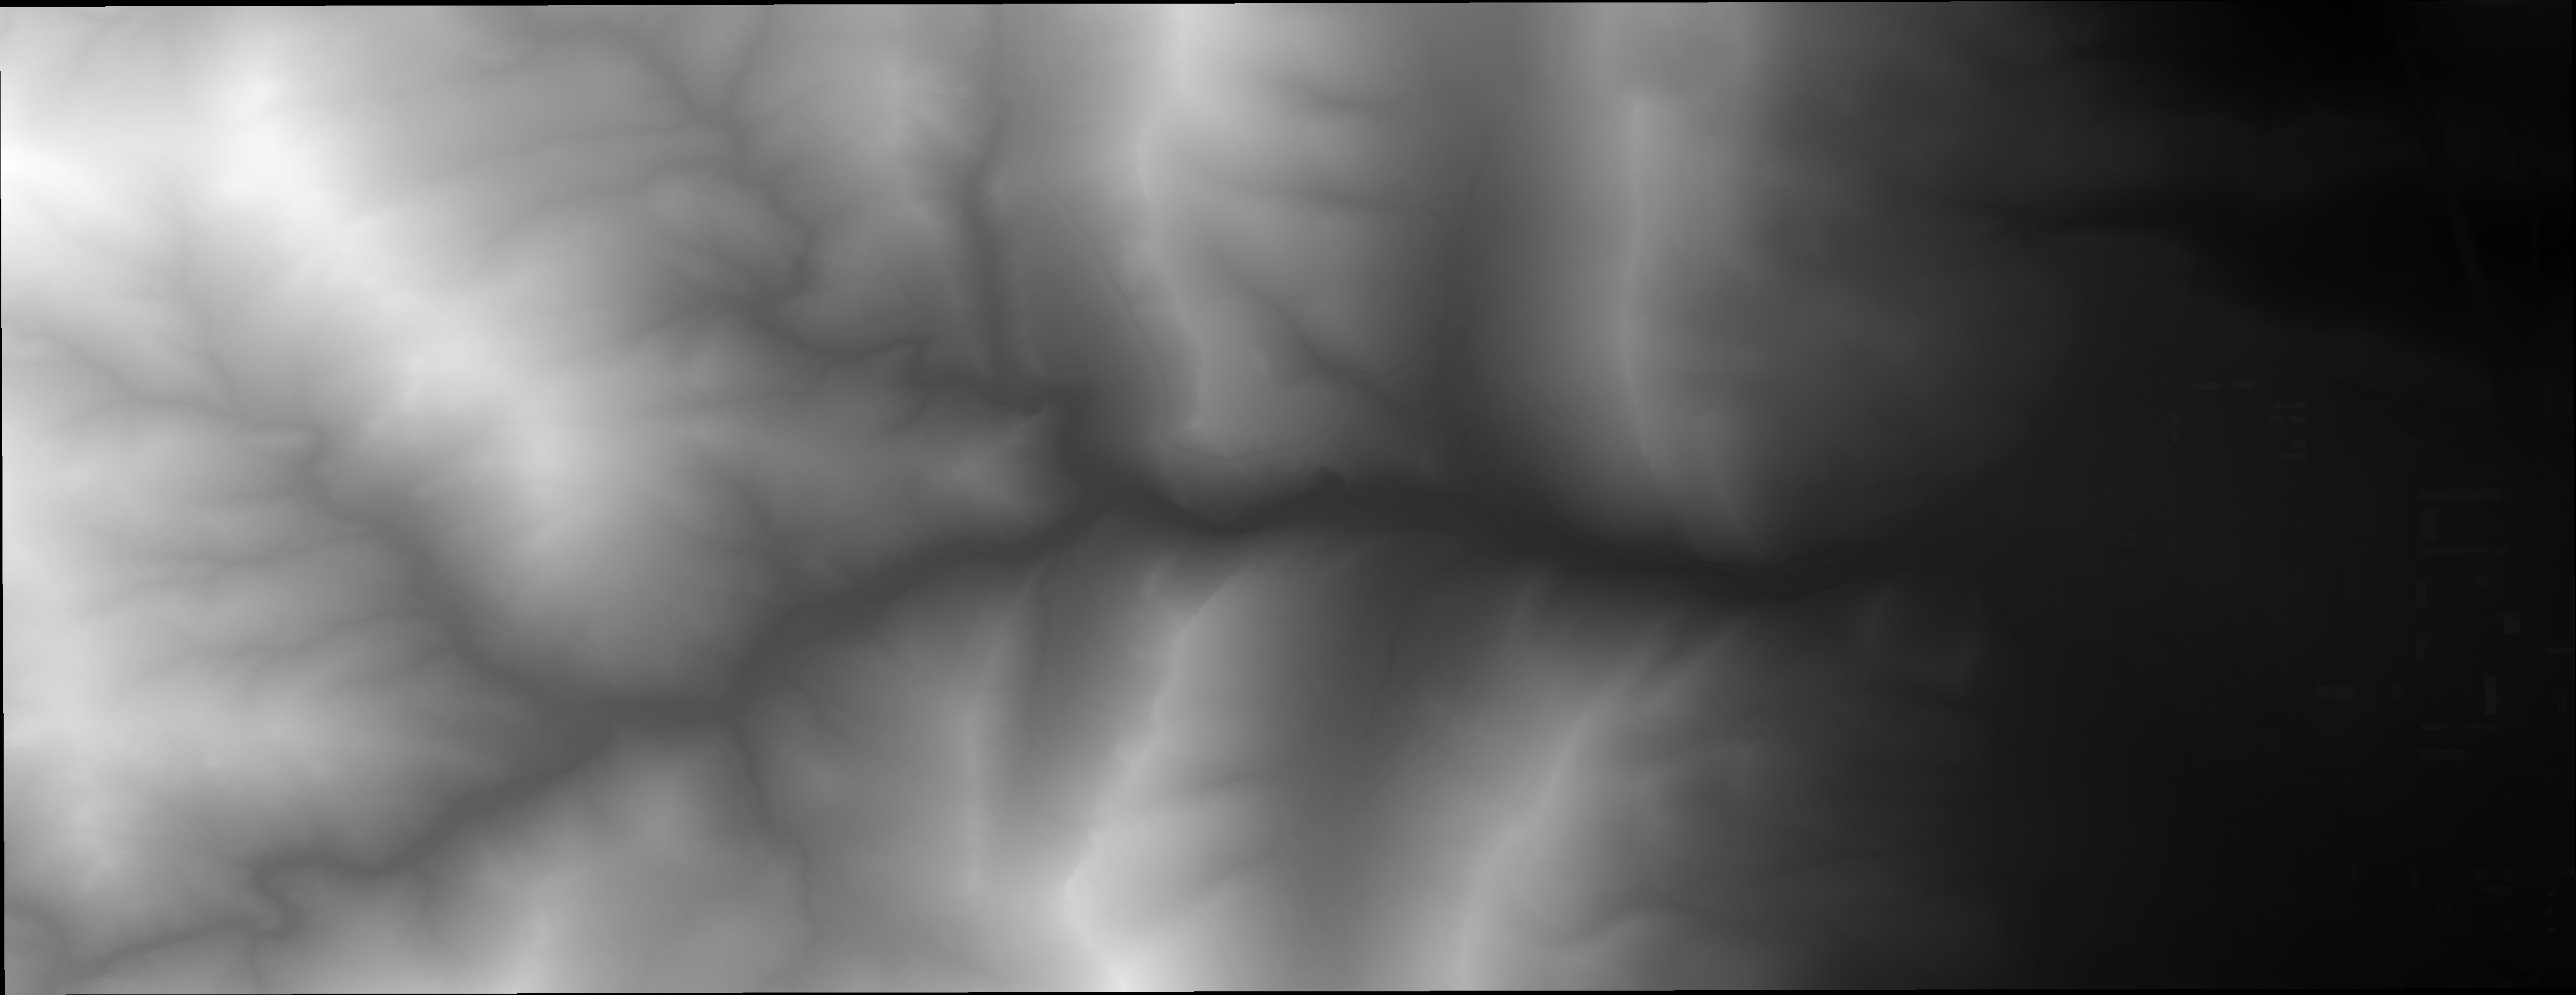

In [114]:
# Stamen Terrain tiles no longer valid...
# Create a map using Stamen Terrain, centered on study area with set zoom level
# Using OpenStreetMap instead
m = folium.Map(location=[40.06, -105.30],
               tiles='OpenStreetMap',
               zoom_start = 13)

map_bounds = [[40.05577828237005, -105.32837712340124],
              [40.073923431943214, -105.28139535136515]]
# Overlay raster called img using add_child() function (opacity and bounding box set)
m.add_child(folium.raster_layers.ImageOverlay(scaled_img,
                                              opacity=.7,
                                              bounds=map_bounds))

# Display map
m


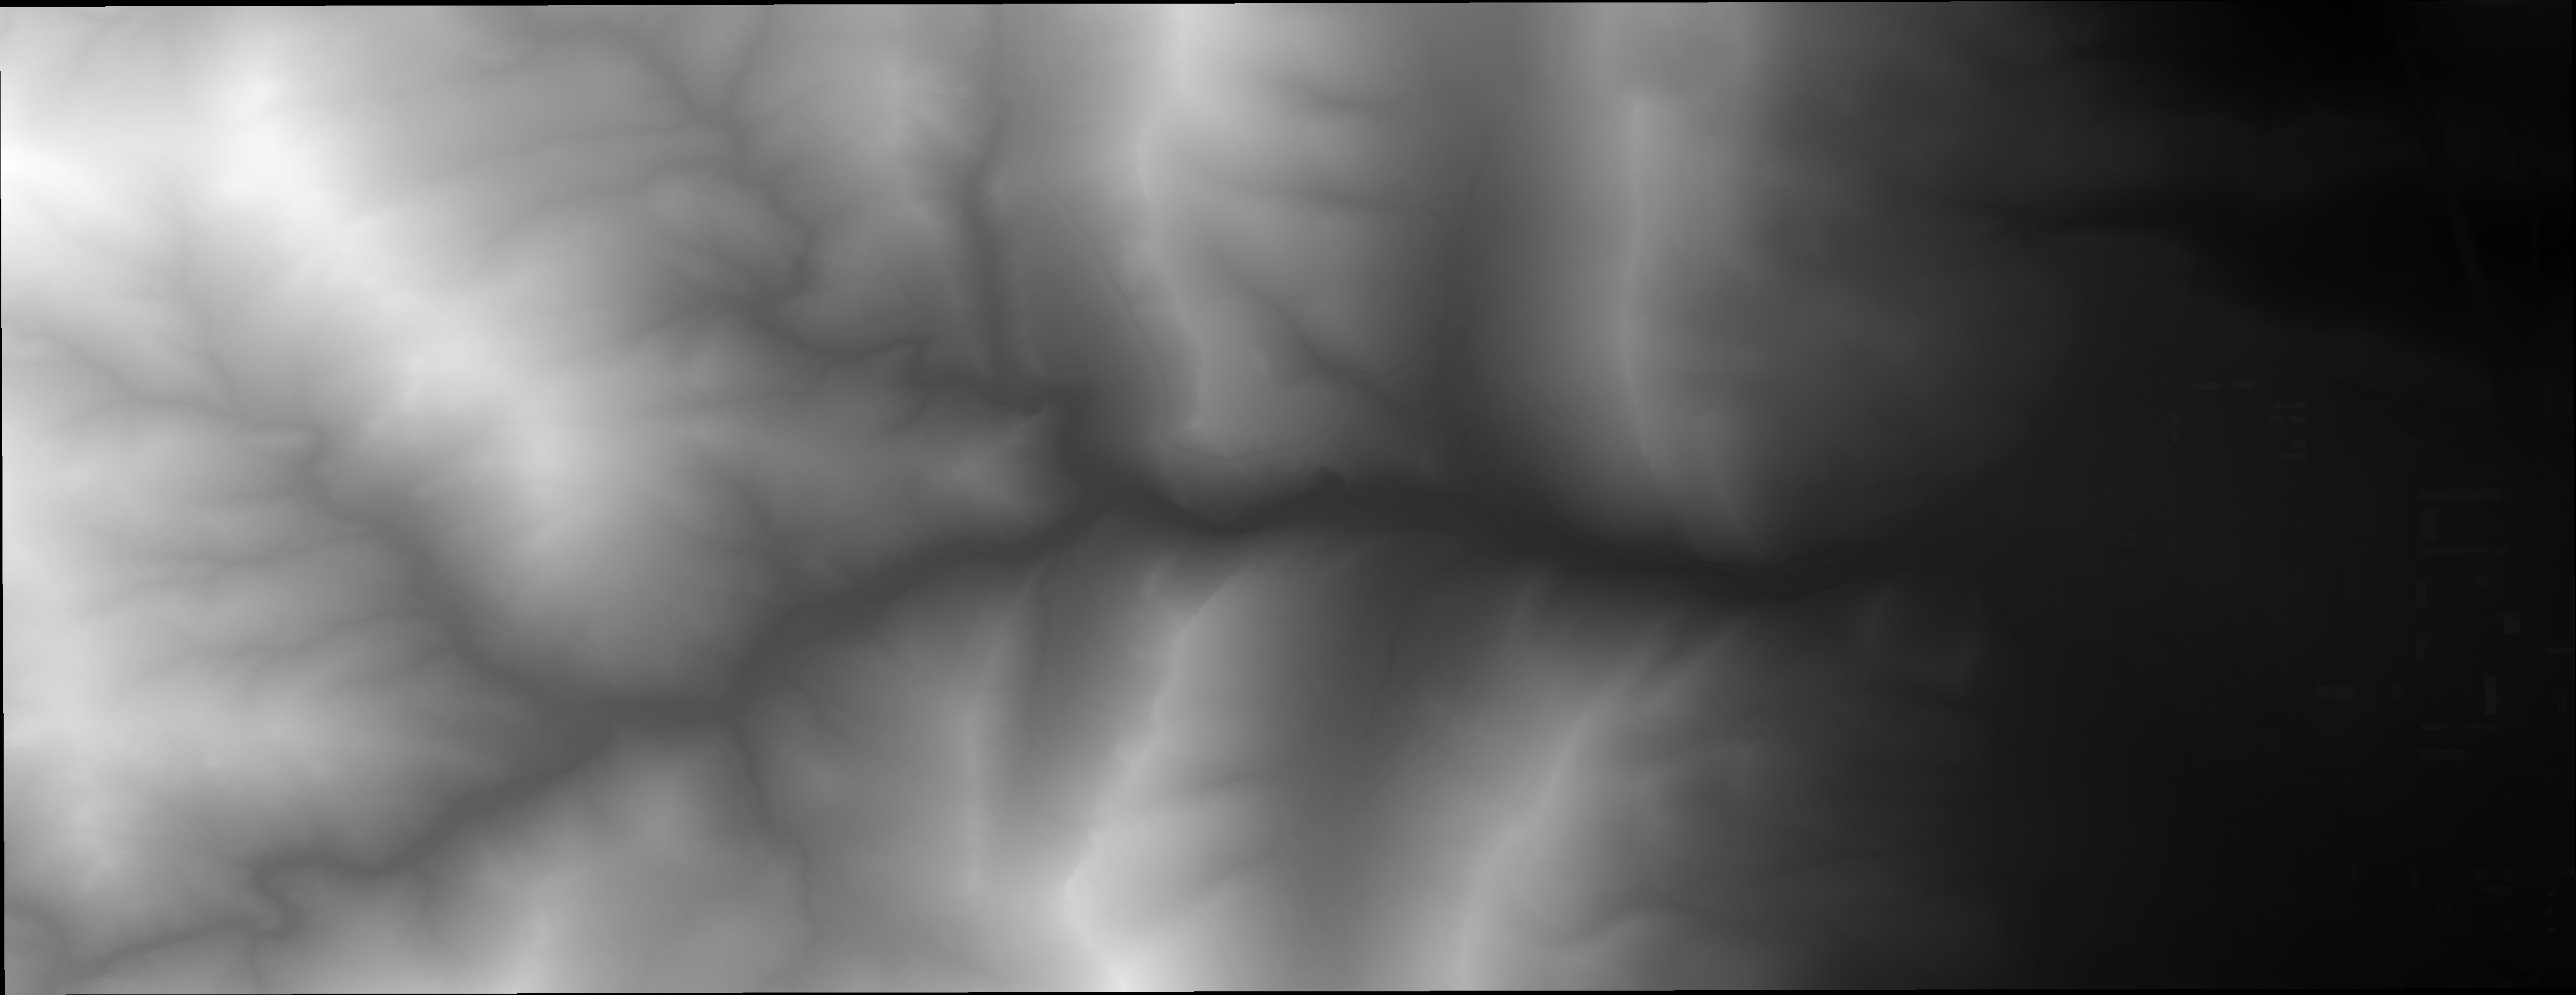

In [110]:
# Alternative way of using StadiaMaps
import folium
import xyzservices.providers as xyz

# Boulder Colorado
m = folium.Map(location=[40.06, -105.30], zoom_start=13)

#Add the Stadia Maps Stamen Toner provider details via xyzservices
tile_provider = xyz.Stadia.StamenTonerLite

#Update the URL to include the API key placeholder
tile_provider["url"] = tile_provider["url"] + "?api_key={api_key}"

#Create the folium TileLayer, specifying the API key
folium.TileLayer(
    tiles=tile_provider.build_url(api_key='YOUR_API_KEY'),
    attr=tile_provider.attribution,
    name=tile_provider.name,
    max_zoom=tile_provider.max_zoom,
    detect_retina=True
).add_to(m)

map_bounds = [[40.05577828237005, -105.32837712340124],
              [40.073923431943214, -105.28139535136515]]
# Overlay raster called img using add_child() function (opacity and bounding box set)
m.add_child(folium.raster_layers.ImageOverlay(scaled_img,
                                              opacity=.7,
                                              bounds=map_bounds))
folium.LayerControl().add_to(m)
m